# Analisis the noise

In [4]:
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import json

# Save data in a more organize way

In [48]:
# Inizialize dictionary
folder_path = "../outdata/outdata3/"
model_name = "NEUROPULSCrossingSide_Arct"
dic = {
    "name_file": "sim_"+model_name+"_N8",
    "arct": model_name,
    "n_inputs": 8,
    "n_epochs": 22000,
    "date": "20251013",
    "train_type": "1-Fidelity",
    "seed": 37,
    "n_matrices": 1000,
    "n_repetitions": 10,
    "lr": 0.001,
    "data_out_type": "Fidelity",
    "rep_type": "max",
    "simulations": []
}

path_file = "../organize_data/" + dic["name_file"] + ".json"

# Save back to file
with open(path_file, 'w', encoding='utf-8') as f:
    json.dump(dic, f, indent=4)

In [69]:
# Load the data from the trained models
folder_path = "../outdata/outdata3/"

num_run = 29
configs = [
    {"index": 0, "model_obj": "Clements_Arct", "pc_loss_dB_max": 0.},
    {"index": 1, "model_obj": "Clements_Arct", "pc_loss_dB_max": 0.1},
    {"index": 2, "model_obj": "Clements_Arct", "pc_loss_dB_max": 0.2},
    {"index": 3, "model_obj": "Clements_Arct", "pc_loss_dB_max": 0.5},
    {"index": 4, "model_obj": "Clements_Arct", "pc_loss_dB_max": 0.75},
    {"index": 5, "model_obj": "Clements_Arct", "pc_loss_dB_max": 1.},
    {"index": 6, "model_obj": "Clements_Arct", "pc_loss_dB_max": 1.25},
    {"index": 7, "model_obj": "Clements_Arct", "pc_loss_dB_max": 1.5},
    {"index": 8, "model_obj": "Clements_Arct", "pc_loss_dB_max": 1.75},
    {"index": 9, "model_obj": "Clements_Arct", "pc_loss_dB_max": 2.},

    {"index": 10, "model_obj": "Fldzhyan_Arct", "pc_loss_dB_max": 0.},
    {"index": 11, "model_obj": "Fldzhyan_Arct", "pc_loss_dB_max": 0.1},
    {"index": 12, "model_obj": "Fldzhyan_Arct", "pc_loss_dB_max": 0.2},
    {"index": 13, "model_obj": "Fldzhyan_Arct", "pc_loss_dB_max": 0.5},
    {"index": 14, "model_obj": "Fldzhyan_Arct", "pc_loss_dB_max": 0.75},
    {"index": 15, "model_obj": "Fldzhyan_Arct", "pc_loss_dB_max": 1.},
    {"index": 16, "model_obj": "Fldzhyan_Arct", "pc_loss_dB_max": 1.25},
    {"index": 17, "model_obj": "Fldzhyan_Arct", "pc_loss_dB_max": 1.5},
    {"index": 18, "model_obj": "Fldzhyan_Arct", "pc_loss_dB_max": 1.75},
    {"index": 19, "model_obj": "Fldzhyan_Arct", "pc_loss_dB_max": 2.},

    {"index": 20, "model_obj": "NEUROPULSCrossingSide_Arct", "pc_loss_dB_max": 0.},
    {"index": 21, "model_obj": "NEUROPULSCrossingSide_Arct", "pc_loss_dB_max": 0.1},
    {"index": 22, "model_obj": "NEUROPULSCrossingSide_Arct", "pc_loss_dB_max": 0.2},
    {"index": 23, "model_obj": "NEUROPULSCrossingSide_Arct", "pc_loss_dB_max": 0.5},
    {"index": 24, "model_obj": "NEUROPULSCrossingSide_Arct", "pc_loss_dB_max": 0.75},
    {"index": 25, "model_obj": "NEUROPULSCrossingSide_Arct", "pc_loss_dB_max": 1.},
    {"index": 26, "model_obj": "NEUROPULSCrossingSide_Arct", "pc_loss_dB_max": 1.25},
    {"index": 27, "model_obj": "NEUROPULSCrossingSide_Arct", "pc_loss_dB_max": 1.5},
    {"index": 28, "model_obj": "NEUROPULSCrossingSide_Arct", "pc_loss_dB_max": 1.75},
    {"index": 29, "model_obj": "NEUROPULSCrossingSide_Arct", "pc_loss_dB_max": 2.},
]
config = next(c for c in configs if c["index"] == num_run)
num_run = config["index"]
pc_loss_dB_max = config["pc_loss_dB_max"]
name_file = "sim_" + config["model_obj"] + "_N8"

repetitions = 10

data_list = []
datalist_fidelities = []
# Walk through the directory and its subdirectories
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".pt"):
            if root.endswith(f"run{num_run}"):
                file_path = os.path.join(root, file)
                data = torch.load(file_path)
                data_list.append(data)

def get_best_fidelity(data_list):
    best_fidelities = []
    for data in data_list:
        fidelities = data["fidelities"]
        for rep in range(repetitions):
            best_fidelity = max(fidelities[rep::repetitions])
            best_fidelities.append(best_fidelity.item())
    return best_fidelities

best_fidelity = get_best_fidelity(data_list)
q1 = np.percentile(best_fidelity, 25)
median = np.percentile(best_fidelity, 50)
q3 = np.percentile(best_fidelity, 75)

path_file = "../organize_data/" + name_file + ".json"

with open(path_file, 'r', encoding='utf-8') as f:
    dict_data_organize = json.load(f)

dict_simulation = {
    "pc_loss_dB_max": pc_loss_dB_max,
    "fidelity_q1": q1,
    "fidelity_median": median,
    "fidelity_q3": q3,
}

# Add symulation
dict_data_organize["simulations"].append(dict_simulation)

In [ ]:
# # Save back to file
# with open(path_file, 'w', encoding='utf-8') as f:
#     json.dump(dict_data_organize, f, indent=4)

# Create Grapth

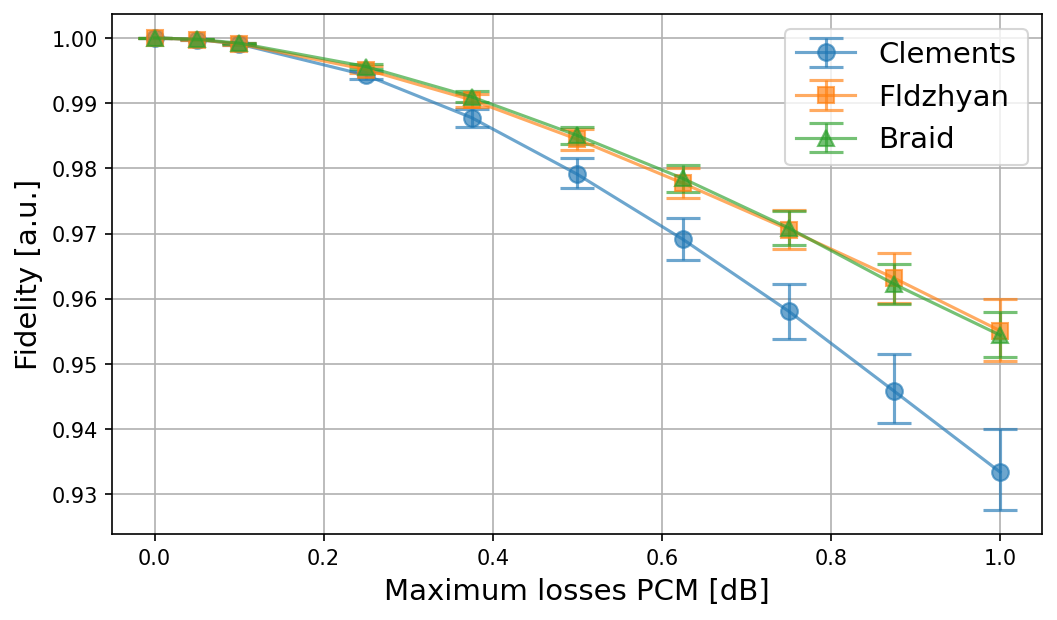

In [72]:
# Create the grapth
import json
import numpy as np
import matplotlib.pyplot as plt

JSON_folder_name = '../organize_data/test_03_PCMPhaseLoss/'
models_choise = [
    'Clements_Arct',
    'Fldzhyan_Arct',
    'NEUROPULSCrossingSide_Arct',]

names_arct = ['Clements', 'Fldzhyan', 'Braid',]
marker = ['o', 's', '^']

plt.figure(figsize=(8, 4.5), dpi=150)
# Download the file
for i_arct, arct in enumerate(models_choise):
    file_JSON = "sim_"+arct+"_N8.json"
    with open(JSON_folder_name+file_JSON, 'r') as file:
        data = json.load(file)
    simulations = data["simulations"]
    sorted_sim = sorted(simulations, key=lambda x: x["pc_loss_dB_max"])
    sorted_sim = sorted_sim
    q25 = [d["fidelity_q1"] for d in sorted_sim]
    q50 = [d["fidelity_median"] for d in sorted_sim]
    q75 = [d["fidelity_q3"] for d in sorted_sim]
    lower_error = np.array(q50) - np.array(q25)
    upper_error = np.array(q75) - np.array(q50)
    pc_loss_dB_max = [d["pc_loss_dB_max"] for d in sorted_sim]
    # ERROR on the losses !!!!!!!!!!!!!!!!
    pc_loss_dB_max = [d/2 for d in pc_loss_dB_max]
    plt.errorbar(pc_loss_dB_max, q50, yerr=[lower_error, upper_error],
                 marker=marker[i_arct], label=names_arct[i_arct],
                 capsize=8, elinewidth=1.5, capthick=1.5,
                 alpha=0.65, markersize=8)
plt.xlabel('Maximum losses PCM [dB]', fontsize=14)
plt.ylabel('Fidelity [a.u.]', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()